<h1>Recent Tech Youtube Video Analysis</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 22/09/2021</h4>


---


<p>This notebook uses YouTube's API to analyse the recent 10 videos of famous technology YouTubers. </p>

In [1]:
# Importing libraries
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Technology YouTuber IDs
ids = ['UCEcrRXW3oEYfUctetZTAWLw', 'UCBJycsmduvYEL83R_U4JriQ', 'UC0vBXGSyV14uvJ4hECDOl0Q', 'UCXuqSBlHAE6Xw-yeJA0Tunw', 'UCdBK94H6oZT2Q7l0-b0xmMg', 'UCeeFfhMcJa1kjtfZAGskOCA', 'UCBZiUUYeLfS5rIj4TQvgSvA', 'UCZSlfzadjnw7G419c_OJ9eg', 'UCMiJRAwDNSNzuYeN2uWa0pA', 'UChIZGfcnjHI0DG4nweWEduw', 'UCR0AnNR7sViH3TWMJl5jyxw', 'UCVYamHliCI9rw1tHR1xbkfw','UC9fSZHEh6XsRpX-xJc6lT3A', 'UCXGgrKt94gR6lmN4aN3mYTg', 'UC3fg6pL63upkXCc0T203wVg', 'UCx9bOYEjkevIDYONBAstK-A', 'UC3XdYJjWliOdKuZMNaTiP8Q', 'UCiQMYozSSTkJ2twtZM1bG9w', 'UCjSEJkpGbcZhvo0lr-44X_w', 'UC4xKdmAXFh4ACyhpiQ_3qBw', 'UCoi3Uk6JtP9QgA5BRwnh6NQ']

In [3]:
# Creating a list for relevant information extracted from the recent 10 videos of the above YouTubers.
id_list = []
for x in ids:
  if x not in id_list:
    id_list.append(x)

titles = []
video_description = []
count = []
average = []
min = []
max = []
views = []
for id in id_list:
  url = f"https://www.youtube.com/feeds/videos.xml?channel_id={id}"
  xml_page = requests.get(url).content
  soup_page = soup(xml_page, "xml")
  videos = soup_page.findAll('entry')

  for video in videos:
    titles.append(video.title.text)
    video_description.append(video.description.text.split("\n\n")[0].split("\n")[0])
    count.append(int(video.starRating.get('count')))
    average.append(float(video.starRating.get('average')))
    views.append(int(video.statistics.get('views')))

dictionary = {
    'titles' : titles,
    'video_description' : video_description,
    'count' : count,
    'average' : average,
    'views' : views,
}

stats = pd.DataFrame(dictionary)
stats['description_length'] = stats['video_description'].apply(lambda x:len(x))
stats['title_length'] = stats['titles'].apply(lambda x:len(x))

In [4]:
stats

,titles,video_description,count,average,views,description_length,title_length
0,New Surface Laptops and a Day Without Facebook,This week Marques and Andrew talk about Facebo...,1920,4.93,44156,324,46
1,Tesla’s Full Self-Driving Rollout with Quinn o...,This week Marques and Andrew talk about the ne...,1910,4.95,50187,251,59
2,The New Space Race!,This week we're back with another special epis...,2232,4.85,48751,318,19
3,"New iPhones, iPad Mini, and all the other Appl...",This week Marques and Andrew go over everythin...,3098,4.93,95689,277,55
4,"TikTok Outperforms YouTube, Another Google Ser...",In this week's episode Marques and Andrew get ...,2046,4.94,52128,284,65
...,...,...,...,...,...,...,...
310,iOS 15 - 10 TIPS & TRICKS!,The iOS 15 software update is now available on...,6622,4.92,329222,364,26
311,Is the iPhone 13 mini worth it now?,Apple just released 4 new iPhone 13 models wit...,1838,4.53,105249,637,35
312,Why I bought the iPhone 13 Pro...,The iPhone 13 and iPhone 13 Pro are officially...,4430,4.37,202014,738,33
313,iPhone 13 VS iPhone 13 Pro - Don't Be FOOLED!,We are just moments away from when the iPhone ...,3021,4.81,142999,405,45


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   titles              315 non-null    object 
 1   video_description   315 non-null    object 
 2   count               315 non-null    int64  
 3   average             315 non-null    float64
 4   views               315 non-null    int64  
 5   description_length  315 non-null    int64  
 6   title_length        315 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 17.4+ KB


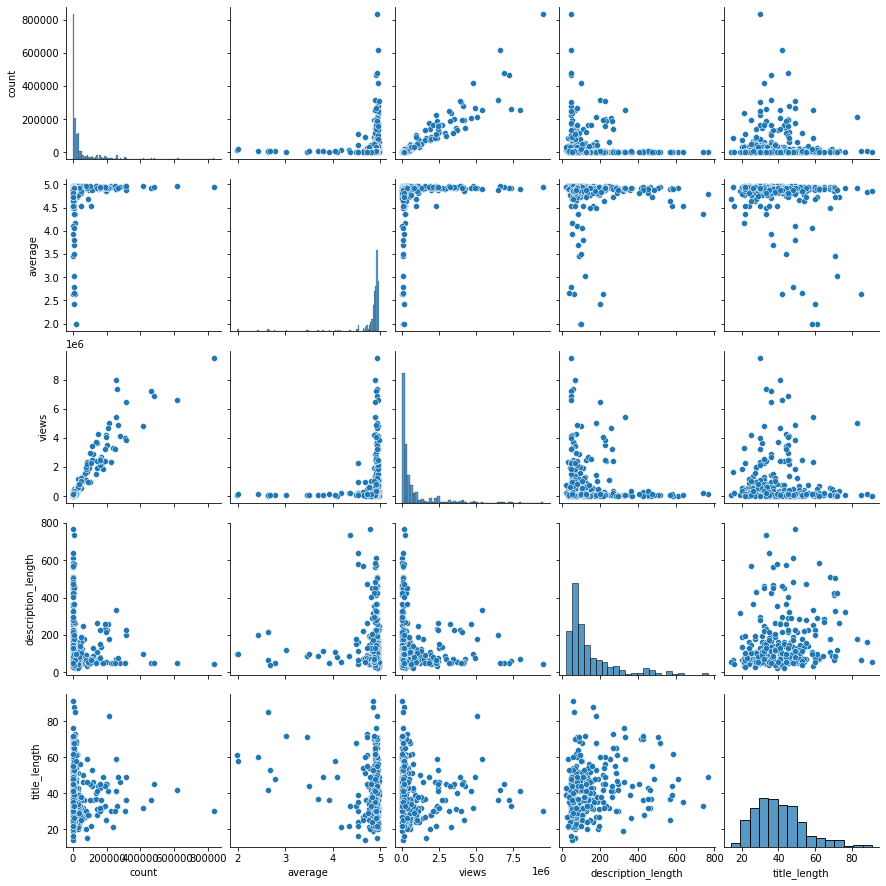

In [7]:
# Uses pairplot to identify potential correlation between each statistic
sns.pairplot(stats)

In [8]:
stats

,titles,video_description,count,average,views,description_length,title_length
0,New Surface Laptops and a Day Without Facebook,This week Marques and Andrew talk about Facebo...,1920,4.93,44156,324,46
1,Tesla’s Full Self-Driving Rollout with Quinn o...,This week Marques and Andrew talk about the ne...,1910,4.95,50187,251,59
2,The New Space Race!,This week we're back with another special epis...,2232,4.85,48751,318,19
3,"New iPhones, iPad Mini, and all the other Appl...",This week Marques and Andrew go over everythin...,3098,4.93,95689,277,55
4,"TikTok Outperforms YouTube, Another Google Ser...",In this week's episode Marques and Andrew get ...,2046,4.94,52128,284,65
...,...,...,...,...,...,...,...
310,iOS 15 - 10 TIPS & TRICKS!,The iOS 15 software update is now available on...,6622,4.92,329222,364,26
311,Is the iPhone 13 mini worth it now?,Apple just released 4 new iPhone 13 models wit...,1838,4.53,105249,637,35
312,Why I bought the iPhone 13 Pro...,The iPhone 13 and iPhone 13 Pro are officially...,4430,4.37,202014,738,33
313,iPhone 13 VS iPhone 13 Pro - Don't Be FOOLED!,We are just moments away from when the iPhone ...,3021,4.81,142999,405,45


---
###Implementing Machine Learning

In [9]:
# importing machine learning libraries for splitting dataset
import sklearn
from sklearn.model_selection import train_test_split

In [10]:
X = stats[['title_length', 'description_length']]
y =  stats['average']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [11]:
print('X_test: ' + str(len(X_test)))
print('y_test: ' + str(len(y_test)))

X_test: 95
y_test: 95


In [19]:
# importing machine learning libraries for Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# training the machine learning model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# importing machine learning libraries for evaluation of the model
from sklearn.metrics import mean_squared_error

In [21]:
# evaluating the model
y_pred = lm.predict(X_test)
mean_squared_error(y_true=y_test, y_pred=y_pred)

0.20688417986082216




---


###Creating a Word Cloud to find recent trends in YouTube video topics

In [22]:
big_string = ''

for title in stats['titles']:
  big_string = big_string + ' ' + str(title)

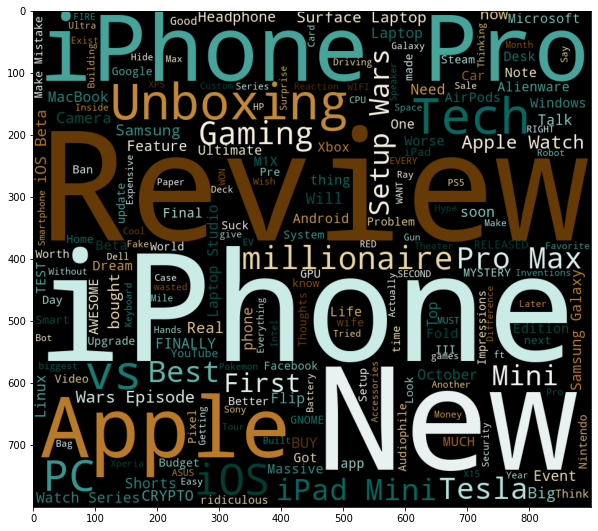

In [24]:
from wordcloud import WordCloud
wc = WordCloud(background_color='black', colormap='BrBG', width=900,height=800).generate(big_string)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plt.imshow(wc)

In the wordcloud, we will be able to observe the recent buzzwords of YouTube video titles.